In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import stats

import math


In [2]:
data = "//mnt/c/Users/Sergiy Vasylyev/Documents/AY_252_Stars/Report/NS_masses.txt"

In [3]:
pulsars = []
with open(data, "r") as file:
    for line in file:
        pulsars.append(line.split("\t"))

! the columns are:

! (i) pulsar mass (in solar masses)

! (ii) minus error in mass (in solar masses)

! (iii) plus error in mass (in solar masses)

! (iv) source category (1: double neutron stars, 2: recycled pulsars; 3: bursters; 4: slow pulsars)

! (v) order of source, sorted according to mass

! (vi) pulsar name

In [4]:
print(pulsars)

[['1.559', '0.005', '0.005', '1', '13', 'J0453+1559\n'], ['1.174', '0.004', '0.004', '1', '0', 'J0453+1559c\n'], ['1.3381', '0.0007', '0.0007', '1', '6', 'J0737-3039A\n'], ['1.2489', '0.0007', '0.0007', '1', '2', 'J0737-3039B\n'], ['1.333', '0.0004', '0.0004', '1', '5', 'B1534+12\n'], ['1.3455', '0.0004', '0.0004', '1', '8', 'B1534+12c\n'], ['1.341', '0.007', '0.007', '1', '7', 'J1756-2251\n'], ['1.23', '0.007', '0.007', '1', '1', 'J1756-2251c\n'], ['1.291', '0.011', '0.011', '1', '3', 'J1906+0746\n'], ['1.322', '0.011', '0.011', '1', '4', 'J1906+0746c\n'], ['1.4398', '0.0002', '0.0002', '1', '12', 'B1913+16\n'], ['1.3886', '0.0002', '0.0002', '1', '11', 'B1913+16c\n'], ['1.358', '0.01', '0.01', '1', '10', 'B2127+11C\n'], ['1.354', '0.01', '0.01', '1', '9', 'B2127+11Cc\n'], ['1.766', '0.991', '0.003', '1', '21', 'J1518+4904\n'], ['0.951', '0.001', '0.995', '1', '14', 'J1518+4904c\n'], ['1.478', '0.71', '0.137', '1', '20', 'J1811-1736\n'], ['1.002', '0.056', '0.872', '1', '15', 'J1811-1

In [5]:
dns_masses = []
dns_sigma_p = []
dns_sigma_n = []
rp_sigma_p = []
rp_sigma_n = []
sp_masses = []
all_masses = []
for i in pulsars:
    if i[3]=='1':
        dns_masses.append(float(i[0]))
        dns_sigma_p.append(float(i[2]))
        dns_sigma_n.append(float(i[1]))
    elif i[3]=='2':
        rp_sigma_p.append(float(i[2]))
        rp_sigma_n.append(float(i[1]))
    all_masses.append(float(i[0]))
#    if i[3]==''

In [6]:
pulsars[2][2]

'0.0007'

In [7]:
dns_masses = [float(i) for i in dns_masses]
recycled_masses = [float(i[0]) for i in pulsars if float(i[3]) == 2]
sp_masses = [float(i[0]) for i in pulsars if float(i[3]) == 4]
masses = [float(i[0]) for i in pulsars] 

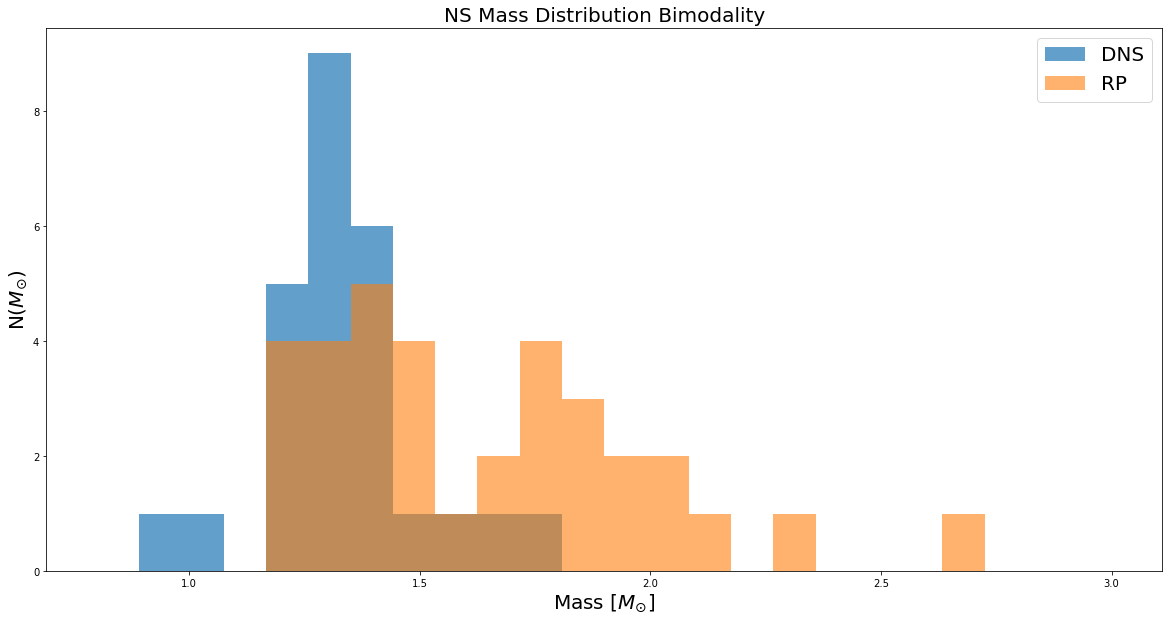

In [8]:
bins = np.linspace(0.8, 3, 25)
plt.figure(figsize = ([20,10]))
plt.title("NS Mass Distribution Bimodality",fontsize="20")
plt.xlabel("Mass [$M_{\odot}$]",fontsize="20")
plt.ylabel("N($M_{\odot}$)",fontsize="20")
plt.hist(dns_masses,bins, alpha=0.7,label="DNS")
plt.hist(recycled_masses,bins,alpha=0.6, label="RP")
plt.legend(fontsize="20")
#plt.hist(sp_masses,bins,alpha=0.5)

In [10]:
rp_fine_ind = [i for i in range(len(recycled_masses)) if float(rp_sigma_p[i]) <= 0.1 and float(rp_sigma_n[i]) <= 0.1]

In [11]:
rp_fine = [float(recycled_masses[i]) for i in rp_fine_ind]

In [12]:
print(len(rp_fine))

13


In [13]:
np.max(rp_fine)

2.14

In [14]:
np.zeros?

In [15]:
prob = np.zeros(len(bins))
def prob_mass(ind,mu,sigma_p,sigma_n,bins):
    bins = np.arange(0,2,.005)
    mu = float(dns_masses[ind])
    sigma = 0.2
    prob=0
    bins_p = np.array([float(i) for i in bins if float(i) >= mu])
    bins_n = np.array([float(i) for i in bins if float(i) <= mu])
    sigma_p = float(dns_sigma_p[ind])
    sigma_n = float(dns_sigma_n[ind])
    print(bins_p)
    prob_p = 1/(sigma_p * np.sqrt(2 * np.pi)) * np.exp( - (bins_p - mu)**2 / (2 * sigma_p**2) )
    prob_n = 1/(sigma_n * np.sqrt(2 * np.pi)) * np.exp( - (bins_n - mu)**2 / (2 * sigma_n**2) )
    return prob+np.array(list(prob_n)+list(prob_p))


In [16]:
ind = 0

In [17]:
bins = np.arange(0,2,.005)
mu = float(dns_masses[ind])
sigma = 0.2

In [18]:
prob=0
bins_p = np.array([float(i) for i in bins if float(i) >= mu])
bins_n = np.array([float(i) for i in bins if float(i) <= mu])
sigma_p = float(dns_sigma_p[ind])
sigma_n = float(dns_sigma_n[ind])
print(bins_p)
prob_p = 1/(sigma_p * np.sqrt(2 * np.pi)) * np.exp( - (bins_p - mu)**2 / (2 * sigma_p**2) )
prob_n = 1/(sigma_n * np.sqrt(2 * np.pi)) * np.exp( - (bins_n - mu)**2 / (2 * sigma_n**2) )
prob+np.array(list(prob_n)+list(prob_p))

[1.56  1.565 1.57  1.575 1.58  1.585 1.59  1.595 1.6   1.605 1.61  1.615
 1.62  1.625 1.63  1.635 1.64  1.645 1.65  1.655 1.66  1.665 1.67  1.675
 1.68  1.685 1.69  1.695 1.7   1.705 1.71  1.715 1.72  1.725 1.73  1.735
 1.74  1.745 1.75  1.755 1.76  1.765 1.77  1.775 1.78  1.785 1.79  1.795
 1.8   1.805 1.81  1.815 1.82  1.825 1.83  1.835 1.84  1.845 1.85  1.855
 1.86  1.865 1.87  1.875 1.88  1.885 1.89  1.895 1.9   1.905 1.91  1.915
 1.92  1.925 1.93  1.935 1.94  1.945 1.95  1.955 1.96  1.965 1.97  1.975
 1.98  1.985 1.99  1.995]


array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [19]:
two_Pk_ind = (np.array(dns_sigma_p) <= 0.1) & (np.array(dns_sigma_n) <= 0.1)

In [20]:
two_Pk_ind = [i for i in range(len(dns_masses)) if float(dns_sigma_p[i]) <= 0.1 and float(dns_sigma_n[i]) <= 0.1]

In [24]:
two_pk_masses = [float(dns_masses[i]) for i in two_Pk_ind]
#two_pk_mean = np.mean(two_)

In [25]:
print(two_pk_masses)

[1.559, 1.174, 1.3381, 1.2489, 1.333, 1.3455, 1.341, 1.23, 1.291, 1.322, 1.4398, 1.3886, 1.358, 1.354, 1.65, 1.24, 1.338, 1.395]


In [26]:
two_pk_std = np.std(np.array(two_pk_masses))
two_pk_mean = np.mean(np.array(two_pk_masses))

dns_mean = np.mean(dns_masses)
dns_std = np.std(dns_masses)
print(dns_mean)
print(dns_std)

print(two_pk_std)
print(two_pk_mean)




1.3336884615384617
0.1655304232481451
0.11001540927423657
1.35255


In [27]:
np.round?

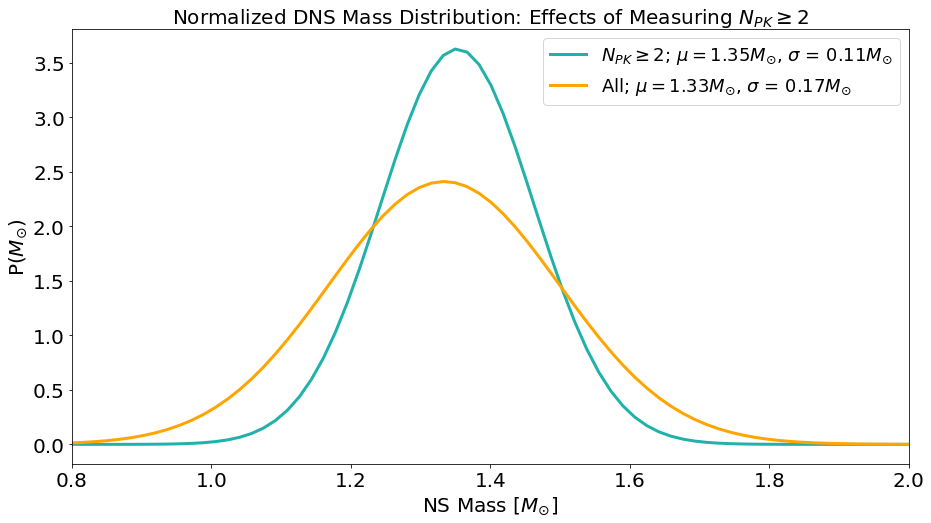

In [54]:
x = np.linspace(0.8, 2.5, 100)
plt.figure(figsize=([15,8]))
plt.plot(x, stats.norm.pdf(x,two_pk_mean,two_pk_std),color="lightseagreen",lw=3.0, label = "$N_{PK} \geq 2$; $\mu =$"+str(np.round(two_pk_mean,2))+"$M_{\odot}$, $\sigma$ = "+str(np.round(two_pk_std,2))+"$M_{\odot}$")
#plt.axvline(dns_mean+2*dns_std,color="lightseagreen", ls='--')
plt.plot(x, stats.norm.pdf(x,dns_mean,dns_std),color="orange",lw=3.0, label = "All; $\mu =$"+str(np.round(dns_mean,2))+"$M_{\odot}$, $\sigma$ = "+str(np.round(dns_std,2))+"$M_{\odot}$")
#plt.axvline(two_pk_mean+2*two_pk_std,color="orange", ls='--')
plt.title("Normalized DNS Mass Distribution: Effects of Measuring $N_{PK} \geq 2$",fontsize="20")
plt.tick_params(labelsize="20")
plt.ylabel("P$(M_{\odot})$", fontsize="20")
plt.xlabel("NS Mass [$M_{\odot}$]",fontsize="20")
plt.xlim(0.8,2.0)
plt.legend(fontsize="18")
plt.savefig('//mnt/c/Users/Sergiy Vasylyev/Documents/AY_252_Stars/Report/norm_dns_PK.pdf')

/home/svasylyev/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/svasylyev/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


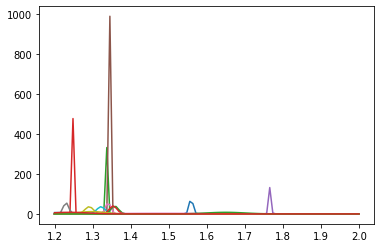

In [29]:
x = np.linspace(1.2, 2, 100)
ptot = np.array(np.zeros(len(x)))
for i in range(len(dns_masses)):
    mu = dns_masses[i]
    sigma = float(dns_sigma_p[i])
    ptot = ptot + stats.norm.pdf(x,mu,sigma)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

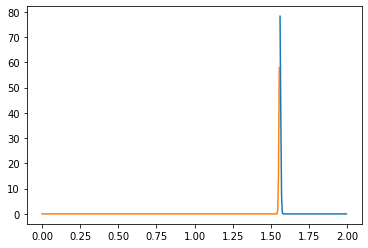

In [30]:
plt.plot(bins_p,prob_p)
plt.plot(bins_n,prob_n)

/home/svasylyev/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/svasylyev/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/svasylyev/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, 

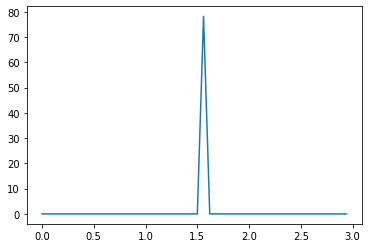

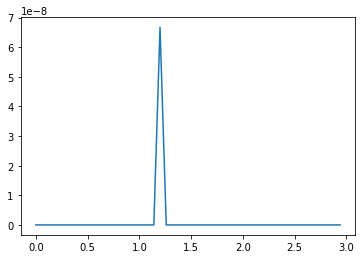

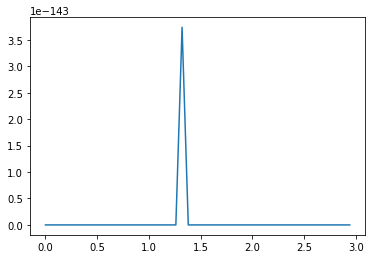

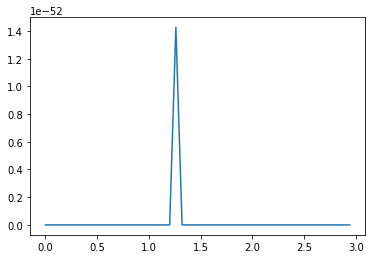

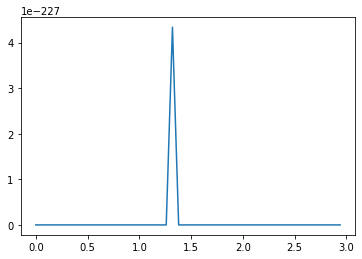

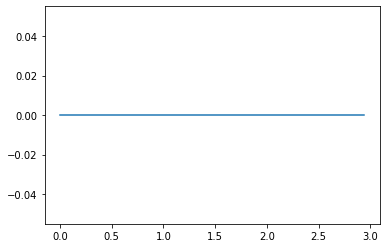

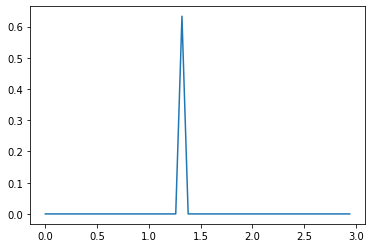

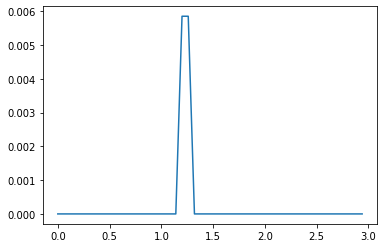

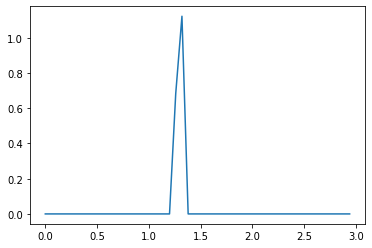

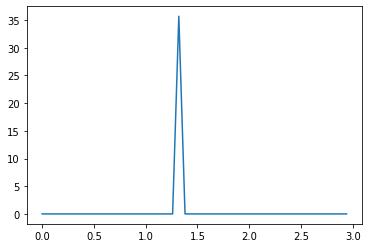

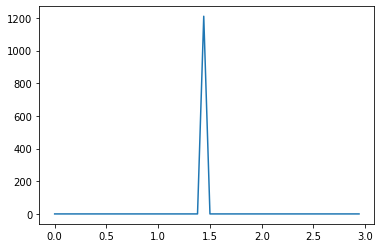

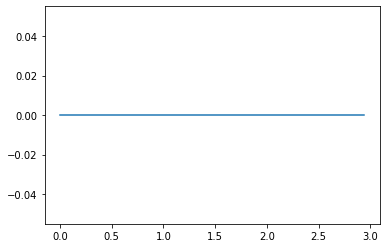

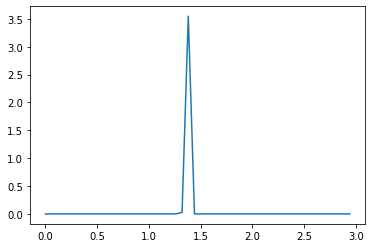

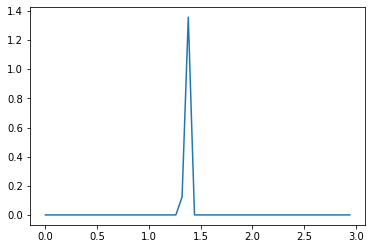

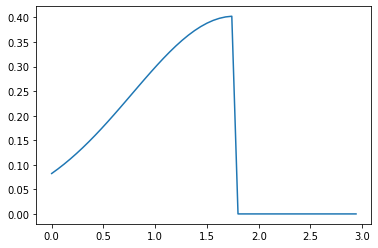

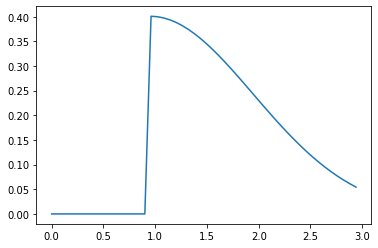

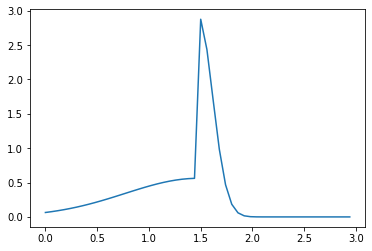

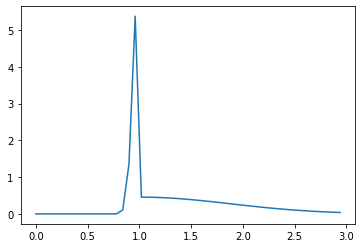

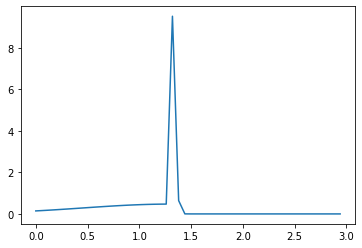

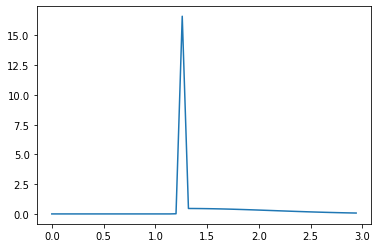

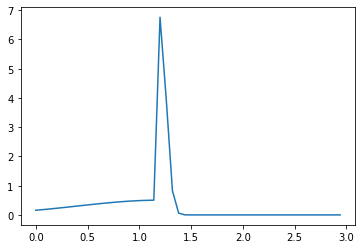

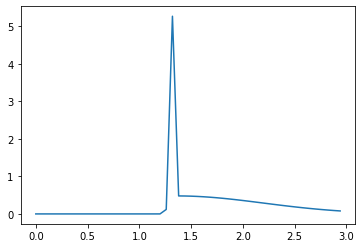

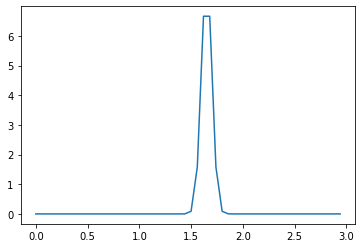

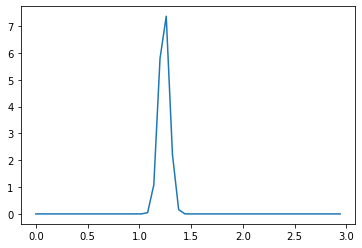

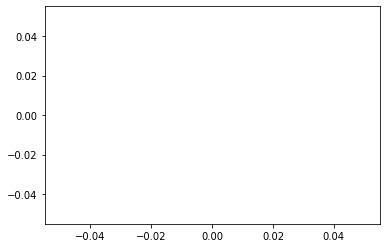

In [31]:
prob = np.array(np.zeros(len(bins)))
for ind in range(len(dns_masses)-1):
    bins = np.arange(0,3,.06)
    mu = float(dns_masses[ind])
    sigma = 0.2
    prob=0
    bins_p = np.array([float(i) for i in bins if float(i) >= mu])
    bins_n = np.array([float(i) for i in bins if float(i) <= mu])
    sigma_p = float(dns_sigma_p[ind])
    sigma_n = float(dns_sigma_n[ind])
    prob_p = 1/(sigma_p * np.sqrt(2 * np.pi)) * np.exp( - (bins_p - mu)**2 / (2 * sigma_p**2) )
    prob_n = 1/(sigma_n * np.sqrt(2 * np.pi)) * np.exp( - (bins_n - mu)**2 / (2 * sigma_n**2) )
    prob = prob+np.array(list(prob_n)+list(prob_p))
    plt.figure()
    plt.plot(bins,prob)
    

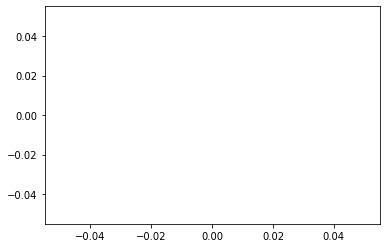

In [24]:
plt.plot(bins,prob)

In [ ]:
rv = stats.skewnorm(sigma_n,sigma_p)

In [ ]:
print(rv)

In [32]:
bins = np.arange(0,50,.1)
y1 = stats.skewnorm .pdf(bins,20, loc=mu, scale=[0.2,4])  
y2 = stats.skewnorm .pdf(bins, 1, loc=mu)  
plt.plot(bins, y1, "*", bins, y2, "r--")

ValueError: operands could not be broadcast together with shapes (500,) (2,) 

In [33]:
stats.skewnorm.pdf?

## Plotting EOS 

In [34]:
def parse_eos(filename):
    with open(filename, "r") as f:
        data = f.readlines()
    
    mr_eos = []
    for i in data:         
        c = i.split("\t\t")
        if "h4" in filename:
            c = i.split("\t")
        mr_eos.append(np.array(c))
    r_eos = [mr_eos[i].astype(np.float)[1] for i in range(len(mr_eos)) if i > 0]
    m_eos = [mr_eos[i].astype(np.float)[2] for i in range(len(mr_eos)) if i > 0]
    if "h4" in filename:
        r_eos = [mr_eos[i].astype(np.float)[1] for i in range(len(mr_eos)) if i > 0]
        m_eos = [mr_eos[i].astype(np.float)[0] for i in range(len(mr_eos)) if i > 0]
    return r_eos, m_eos
    

In [35]:
def parse_eos(filename):
    with open(filename, "r") as f:
        data = f.readlines()
    
    mr_eos = []
    for i in data:         
        c = i.split("\t\t")
        if "h4" in filename:
            c = i.split("\t")
        if "mpa1" in filename:
            c = i.split("\t")
        mr_eos.append(np.array(c))
    if "h4" in filename:
        r_eos = [mr_eos[i].astype(np.float)[1] for i in range(len(mr_eos)) if i > 0]
        m_eos = [mr_eos[i].astype(np.float)[0] for i in range(len(mr_eos)) if i > 0]
    elif "mpa1" in filename:
        r_eos = [mr_eos[i].astype(np.float)[1] for i in range(len(mr_eos)) if i > 0]
        m_eos = [mr_eos[i].astype(np.float)[0] for i in range(len(mr_eos)) if i > 0]
    else:
        r_eos = [mr_eos[i].astype(np.float)[1] for i in range(len(mr_eos)) if i > 0]
        m_eos = [mr_eos[i].astype(np.float)[2] for i in range(len(mr_eos)) if i > 0]
    return r_eos, m_eos
    

In [36]:
with open("//mnt/c/Users/Sergiy Vasylyev/Downloads/mr_tables/MR/mrh4.dat", "r") as f:
    data = f.readlines()

In [37]:
print(data)

['! Mass (Msolar) Radius (km) n/a\n', '0.02\t258.20612056208734\t0.0002534684576788405\n', '0.04\t258.20612056208734\t0.0002534684576788405\n', '0.06\t258.20612056208734\t0.0002534684576788405\n', '0.08\t50.14634622757886\t0.00015359289796776823\n', '0.1\t27.21646189894957\t0.0012113179575981238\n', '0.12\t21.285882406947657\t0.004448214188282781\n', '0.14\t18.5868344969952\t0.009834555415266405\n', '0.16\t17.075032438926833\t0.01679657686632604\n', '0.18\t16.124342411234796\t0.02470539358704348\n', '0.2\t15.482847550760683\t0.03306267082919416\n', '0.22\t15.029438375475756\t0.04151104819150148\n', '0.24\t14.697155049262072\t0.049809310738702456\n', '0.26\t14.4477329969799\t0.057803954095324836\n', '0.28\t14.257242904303277\t0.06539455256897495\n', '0.3\t14.109190266431096\t0.07253202861461386\n', '0.32\t13.993124543289687\t0.07918822327956676\n', '0.34\t13.901352829185342\t0.08535786819953929\n', '0.36\t13.828421399899906\t0.09104828086793601\n', '0.38\t13.770427758821725\t0.096270705

In [38]:
mr_eos = []
for i in data:
    c = i.split("\t")
    print(c)
    mr_eos.append(np.array(c))

['! Mass (Msolar) Radius (km) n/a\n']
['0.02', '258.20612056208734', '0.0002534684576788405\n']
['0.04', '258.20612056208734', '0.0002534684576788405\n']
['0.06', '258.20612056208734', '0.0002534684576788405\n']
['0.08', '50.14634622757886', '0.00015359289796776823\n']
['0.1', '27.21646189894957', '0.0012113179575981238\n']
['0.12', '21.285882406947657', '0.004448214188282781\n']
['0.14', '18.5868344969952', '0.009834555415266405\n']
['0.16', '17.075032438926833', '0.01679657686632604\n']
['0.18', '16.124342411234796', '0.02470539358704348\n']
['0.2', '15.482847550760683', '0.03306267082919416\n']
['0.22', '15.029438375475756', '0.04151104819150148\n']
['0.24', '14.697155049262072', '0.049809310738702456\n']
['0.26', '14.4477329969799', '0.057803954095324836\n']
['0.28', '14.257242904303277', '0.06539455256897495\n']
['0.3', '14.109190266431096', '0.07253202861461386\n']
['0.32', '13.993124543289687', '0.07918822327956676\n']
['0.34', '13.901352829185342', '0.08535786819953929\n']
['0.

In [39]:
print(mr_eos[2].astype(np.float))

[4.00000000e-02 2.58206121e+02 2.53468458e-04]


In [40]:
r_eos = [mr_eos[i].astype(np.float)[1] for i in range(len(mr_eos)) if i > 0]
m_eos = [mr_eos[i].astype(np.float)[0] for i in range(len(mr_eos)) if i > 0]

In [41]:
print(m_eos)
print(r_eos)

[0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7000000000000001, 0.72, 0.74, 0.76, 0.78, 0.8, 0.8200000000000001, 0.84, 0.86, 0.88, 0.9, 0.92, 0.9400000000000001, 0.96, 0.98, 1.0, 1.02, 1.04, 1.06, 1.08, 1.1, 1.12, 1.1400000000000001, 1.16, 1.18, 1.2, 1.22, 1.24, 1.26, 1.28, 1.3, 1.32, 1.34, 1.36, 1.3800000000000001, 1.4000000000000001, 1.42, 1.44, 1.46, 1.48, 1.5, 1.52, 1.54, 1.56, 1.58, 1.6, 1.62, 1.6400000000000001, 1.6600000000000001, 1.68, 1.7, 1.72, 1.74, 1.76, 1.78, 1.8, 1.82, 1.84, 1.86, 1.8800000000000001, 1.9000000000000001, 1.92, 1.94, 1.96, 1.98, 2.0, 2.02]
[258.20612056208734, 258.20612056208734, 258.20612056208734, 50.14634622757886, 27.21646189894957, 21.285882406947657, 18.5868344969952, 17.075032438926833, 16.124342411234796, 15.482847550760683, 15.029438375475756, 14.697155049262072, 14.4477329969799, 14.257242904303

In [42]:
def plot_eos(name):
#'''Input Param: name of model 1-D list'''
    plt.figure(figsize=([20,10]))
    for i in name:
        r, m = parse_eos("//mnt/c/Users/Sergiy Vasylyev/Downloads/mr_tables/MR/mr"+str(i)+".dat")
        plt.plot(r,m,label=str(i).upper())
        plt.title("Neutron Star EOS models: Mass-Radius Relation", fontsize="25")
        plt.xlabel("Radius [km]", fontsize="25")
        plt.ylabel("Mass [$M_{\odot}$]", fontsize="25")
        plt.legend( fontsize="25")

In [43]:
stats.gaussian_kde(dns_masses)

In [46]:
xbh = np.linspace(0,20,30)
ybh = (1/2)*xbh

APR4 Nucleons 2.22 11.13 [33]
MPA1 Nucleons 2.47 12.08 [33]
MS1 Nucleons 2.78 14.77 [34]
SLy Nucleons 2.06 11.45 [35]
H4 Nuc., Σ, Λ 2.04 13.57 [30]
ALF1 u, d, s quarks 1.50 9.63 [31]
SQM1 Nuc., s quarks 1.56 8.89 [36]

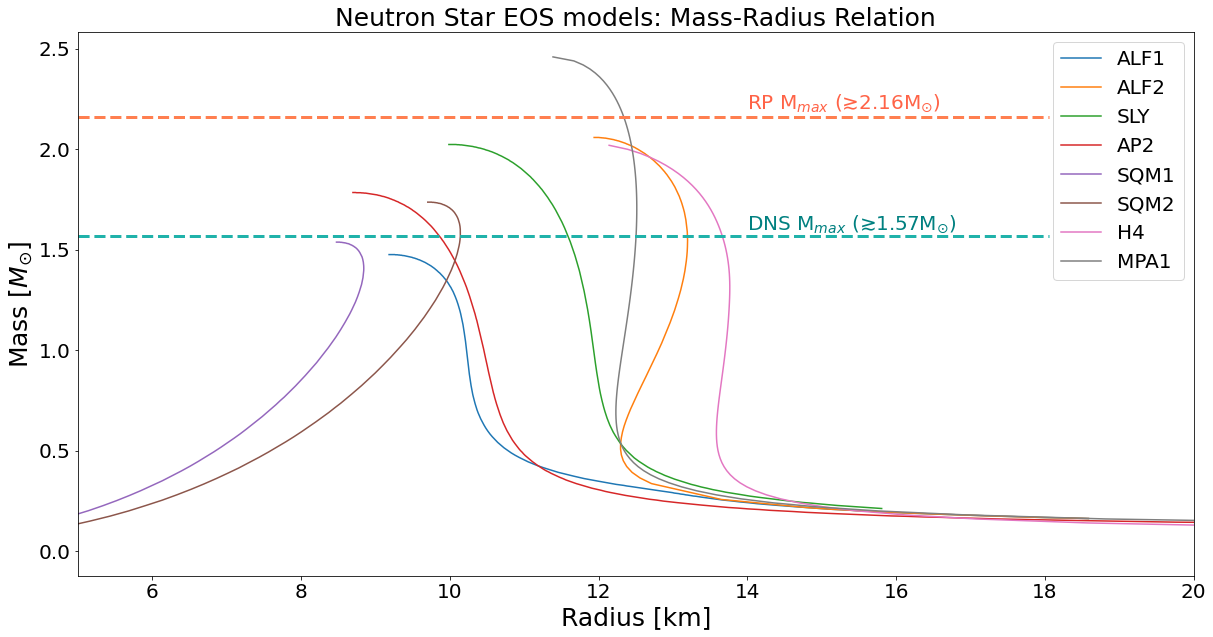

In [47]:
import seaborn as sns
df = sns.load_dataset('iris')
radii_test = [12.3,14,10.2,9.8,13.2,10.5]
#test = [1.4	10.3 3.5	3.6]
plot_eos(['alf1','alf2','sly','ap2','sqm1','sqm2','h4','mpa1']) # from mrtable folder
#plt.errorbar(10.3,1.4, xlolims=3.6, xuplims=3.5)
#lower_quartile = 3.5
#upper_quartile = 3.6
#plt.errorbar(10.3, 1.4, xerr=np.array([[lower_quartile ,upper_quartile]]).T, 
#        fmt='ko')
#plt.scatter(radii_test,dns_masses[:len(radii_test)])
plt.axhline(2.16, ls="--",lw=3.0, color="coral",xmax=0.87)
plt.axhline(1.57, ls="--",lw=3.0, color="lightseagreen",xmax=0.87)
plt.text(14,2.2,"RP M$_{max}$ ($\gtrsim$2.16M$_{\odot}$)",fontsize="20", color="tomato")
plt.text(14,1.6,"DNS M$_{max}$ ($\gtrsim$1.57M$_{\odot}$)",fontsize="20", color="teal")
plt.tick_params(labelsize="20")
#plt.plot(xbh,ybh)

plt.legend(fontsize="20")
plt.xlim(5,20)
#sns.jointplot(x=dns_masses, y=df["sepal_width"][:len(dns_masses)], kind='kde', color="grey", space=0)
plt.savefig("//mnt/c/Users/Sergiy Vasylyev/Documents/AY_252_Stars/Report/EOS_models.pdf")

In [48]:
mmax_eos = []
eos = ['alf1','alf2','sly','ap2','sqm1','sqm2','h4','mpa1']
for i in eos:
    file = "//mnt/c/Users/Sergiy Vasylyev/Downloads/mr_tables/MR/mr"+str(i)+".dat"
    radius, mass = parse_eos(file)
    mmax_eos.append(np.max(mass))

In [49]:
print(rp_fine)

[1.4378, 2.01, 1.44, 1.72, 1.928, 1.47, 1.3655, 1.667, 1.47, 1.832, 1.393, 1.65, 2.14]


In [50]:
print(np.sort(mmax_eos))

[1.476 1.538 1.737 1.785 2.02  2.024 2.059 2.46 ]


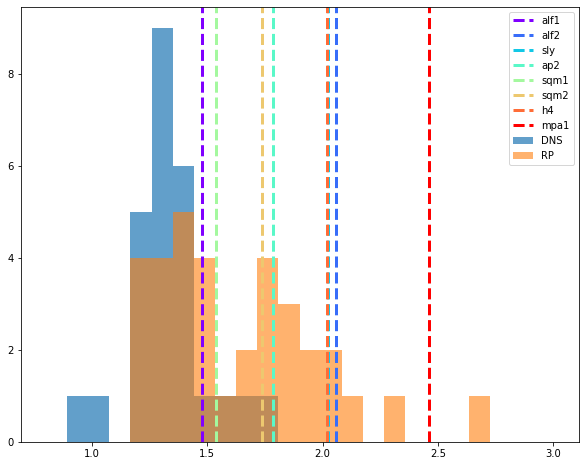

In [55]:
bins = np.linspace(0.8, 3, 25)
plt.figure(figsize = ([10,8]))
number = len(eos)
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number)]
for i in range(len(eos)):
    plt.axvline(mmax_eos[i],color=colors[i],label=eos[i], lw=3.0,ls='--')
plt.hist(dns_masses,bins, alpha=0.7,label="DNS")
plt.hist(recycled_masses,bins,alpha=0.6,label="RP")
plt.legend()
#plt.hist(all_masses,bins)
#plt.hist(sp_masses,bins,alpha=0.5)

In [56]:
print(len(rp_fine))

13


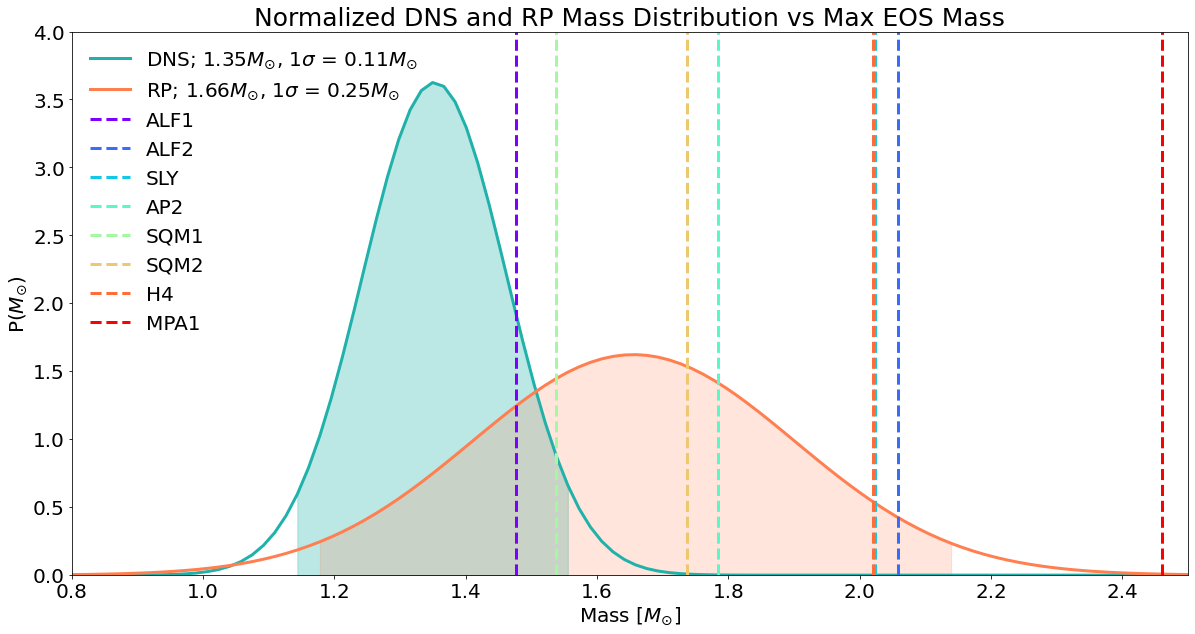

In [57]:
plt.figure(figsize=([20,10]))
plt.plot(x, stats.norm.pdf(x,two_pk_mean,two_pk_std),color="lightseagreen",lw=3.0, label = "DNS; "+str(np.round(two_pk_mean,2))+"$M_{\odot}$, $1\sigma$ = "+str(np.round(two_pk_std,2))+"$M_{\odot}$")
plt.fill_between(x, stats.norm.pdf(x,two_pk_mean,two_pk_std), 0, where = ((two_pk_mean-2*two_pk_std)<x) & (x<(two_pk_mean+2*two_pk_std)),alpha=0.3,color="lightseagreen")
plt.plot(x, stats.norm.pdf(x,np.mean(rp_fine),np.std(rp_fine)),color="coral", lw=3.0,label = "RP; "+str(np.round(np.mean(rp_fine),2))+"$M_{\odot}$, $1\sigma$ = "+str(np.round(np.std(rp_fine),2))+"$M_{\odot}$")
plt.fill_between(x,stats.norm.pdf(x,np.mean(rp_fine),np.std(rp_fine)), 0, where = ((np.mean(rp_fine)-2*np.std(rp_fine))<x) & (x<(np.mean(rp_fine)+2*np.std(rp_fine))),alpha=0.2,color="coral")
for i in range(len(eos)):
    plt.axvline(mmax_eos[i],color=colors[i],label=eos[i].upper(), lw=3.0,ls='--')
plt.xlim(0.8,2.5)
plt.ylim(0,4)
plt.tick_params(labelsize="20")
plt.title("Normalized DNS and RP Mass Distribution vs Max EOS Mass",fontsize="25")
plt.xlabel("Mass [$M_{\odot}$]",fontsize="20")
plt.ylabel("P($M_{\odot}$)",fontsize="20")
plt.legend(fontsize="20",loc="upper left", frameon=False)
plt.savefig("//mnt/c/Users/Sergiy Vasylyev/Documents/AY_252_Stars/Report/Dist_Max_Eos.pdf")

## Inferred maximum mass (lower limit) for DNS: 1.57 Msol (mean + 2 sigma)
## Inferred maximum mass (lower limit) for RP: 2.16 Msol (mean + 2 sigma)

In [92]:
print(dns_masses)

[1.559, 1.174, 1.3381, 1.2489, 1.333, 1.3455, 1.341, 1.23, 1.291, 1.322, 1.4398, 1.3886, 1.358, 1.354, 1.766, 0.951, 1.478, 1.002, 1.298, 1.273, 1.199, 1.363, 1.65, 1.24, 1.338, 1.395]


In [122]:
print(pulsars)

[['1.559', '0.005', '0.005', '1', '13', 'J0453+1559\n'], ['1.174', '0.004', '0.004', '1', '0', 'J0453+1559c\n'], ['1.3381', '0.0007', '0.0007', '1', '6', 'J0737-3039A\n'], ['1.2489', '0.0007', '0.0007', '1', '2', 'J0737-3039B\n'], ['1.333', '0.0004', '0.0004', '1', '5', 'B1534+12\n'], ['1.3455', '0.0004', '0.0004', '1', '8', 'B1534+12c\n'], ['1.341', '0.007', '0.007', '1', '7', 'J1756-2251\n'], ['1.23', '0.007', '0.007', '1', '1', 'J1756-2251c\n'], ['1.291', '0.011', '0.011', '1', '3', 'J1906+0746\n'], ['1.322', '0.011', '0.011', '1', '4', 'J1906+0746c\n'], ['1.4398', '0.0002', '0.0002', '1', '12', 'B1913+16\n'], ['1.3886', '0.0002', '0.0002', '1', '11', 'B1913+16c\n'], ['1.358', '0.01', '0.01', '1', '10', 'B2127+11C\n'], ['1.354', '0.01', '0.01', '1', '9', 'B2127+11Cc\n'], ['1.766', '0.991', '0.003', '1', '21', 'J1518+4904\n'], ['0.951', '0.001', '0.995', '1', '14', 'J1518+4904c\n'], ['1.478', '0.71', '0.137', '1', '20', 'J1811-1736\n'], ['1.002', '0.056', '0.872', '1', '15', 'J1811-1

(array([ 4., 12., 25., 13., 11.,  7.,  4.,  2.,  0.,  1.]),
 array([0.951 , 1.1193, 1.2876, 1.4559, 1.6242, 1.7925, 1.9608, 2.1291,
        2.2974, 2.4657, 2.634 ]),
 <a list of 10 Patch objects>)

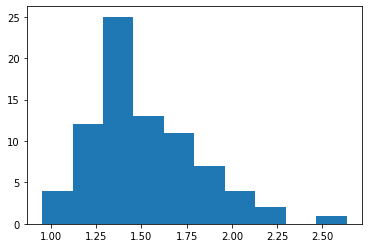

In [128]:
plt.hist(all_masses)

In [ ]:
### interesting that it is hard to see the bimodality here.

(0.0, 4.0)

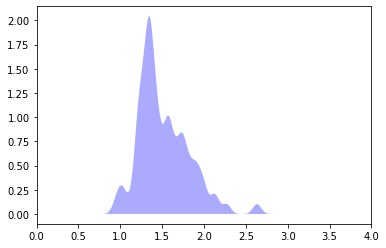

In [131]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# `normed` is being deprecated in favor of `density` in histograms
if LooseVersion(matplotlib.__version__) >= '2.1':
    density_param = {'density': True}
else:
    density_param = {'normed': True}

# ----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(0, 3, 60)

#fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
#fig.subplots_adjust(hspace=0.05, wspace=0.05)
X = np.array(all_masses)[:, np.newaxis]

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(X)
log_dens = kde.score_samples(X_plot)
plt.fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
#plt.text(-3.5, 0.31, "Gaussian Kernel Density")
plt.xlim(0,4)


In [43]:
with open("//mnt/c/Users/Sergiy Vasylyev/Downloads/MRprob/MRprob_X7.dat", "r") as f:
    mrs = f.readlines()


In [47]:
mr_array = []
for i in data:
    c = i.split("\t\t")
    mr_array.append(np.array(c))

In [48]:
print(mr_array)

[array(['! central density (gr/cm^3) \t Radius (km) \t Mass (Msolar)\n'],
      dtype='<U58'), array(['3.009952e+14 ', '\t 18.585 ', '  0.162\n'], dtype='<U13'), array(['3.040052e+14 ', '\t 18.279 ', '  0.165\n'], dtype='<U13'), array(['3.070453e+14 ', '\t 17.992 ', '  0.167\n'], dtype='<U13'), array(['3.101157e+14 ', '\t 17.707 ', '  0.170\n'], dtype='<U13'), array(['3.132169e+14 ', '\t 17.439 ', '  0.173\n'], dtype='<U13'), array(['3.163490e+14 ', '\t 17.185 ', '  0.176\n'], dtype='<U13'), array(['3.195125e+14 ', '\t 16.936 ', '  0.179\n'], dtype='<U13'), array(['3.227076e+14 ', '\t 16.703 ', '  0.182\n'], dtype='<U13'), array(['3.259347e+14 ', '\t 16.477 ', '  0.185\n'], dtype='<U13'), array(['3.291941e+14 ', '\t 16.259 ', '  0.188\n'], dtype='<U13'), array(['3.324860e+14 ', '\t 16.055 ', '  0.191\n'], dtype='<U13'), array(['3.358109e+14 ', '\t 15.854 ', '  0.194\n'], dtype='<U13'), array(['3.391690e+14 ', '\t 15.664 ', '  0.198\n'], dtype='<U13'), array(['3.425607e+14 ', '\t 15.482